In [23]:
import folium
import pandas as pd
import numpy as np
from plotnine import *
import re

In [24]:
import warnings
# 경고 메세지 안뜨게
warnings.filterwarnings('ignore')

In [25]:
# folium 맵 테스트
gps = [35.157675, 129.059196]
zoom = 17
map = folium.Map(location=gps,zoom_start=zoom)
map

In [26]:
park = pd.read_csv('data/all_park.csv', encoding="euc-kr")
park.shape

(18870, 20)

In [27]:
park.head(2)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868,1760.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN


In [28]:
park.info()

# 필요한 위도, 경도 => 수치형으로 나와있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Data columns (total 20 columns):
관리번호            18870 non-null object
공원명             18870 non-null object
공원구분            18870 non-null object
소재지도로명주소        8742 non-null object
소재지지번주소         17751 non-null object
위도              18870 non-null float64
경도              18870 non-null float64
공원면적            18870 non-null float64
공원보유시설(운동시설)    5005 non-null object
공원보유시설(유희시설)    7345 non-null object
공원보유시설(편익시설)    5508 non-null object
공원보유시설(교양시설)    1240 non-null object
공원보유시설(기타시설)    3218 non-null object
지정고시일           15913 non-null object
관리기관명           18116 non-null object
전화번호            17680 non-null object
데이터기준일자         18870 non-null object
제공기관코드          18870 non-null object
제공기관명           18870 non-null object
Unnamed: 19     0 non-null float64
dtypes: float64(4), object(16)
memory usage: 2.9+ MB


In [30]:
# 결측치 확인
park.isnull().sum()

# 시설쪽에 빈 게 많다.

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10128
소재지지번주소          1119
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13865
공원보유시설(유희시설)    11525
공원보유시설(편익시설)    13362
공원보유시설(교양시설)    17630
공원보유시설(기타시설)    15652
지정고시일            2957
관리기관명             754
전화번호             1190
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18870
dtype: int64

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# 한글처리
import platform
from matplotlib import font_manager, rc

# 한글 처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == "Darwin": # 맥
    rc('font', family='AppleGothic')
elif platform.system() == "Linux": # 리눅스
    rc('font', family='NanumGothic')
elif platform.system() == "Windows": # 윈도우
#     fontName = font_manager.FontProperties( fname=fontPath).get_name()
    rc('font', family='NanumGothic')
else:
    print('알 수 없는 시스템. 미적용')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
    

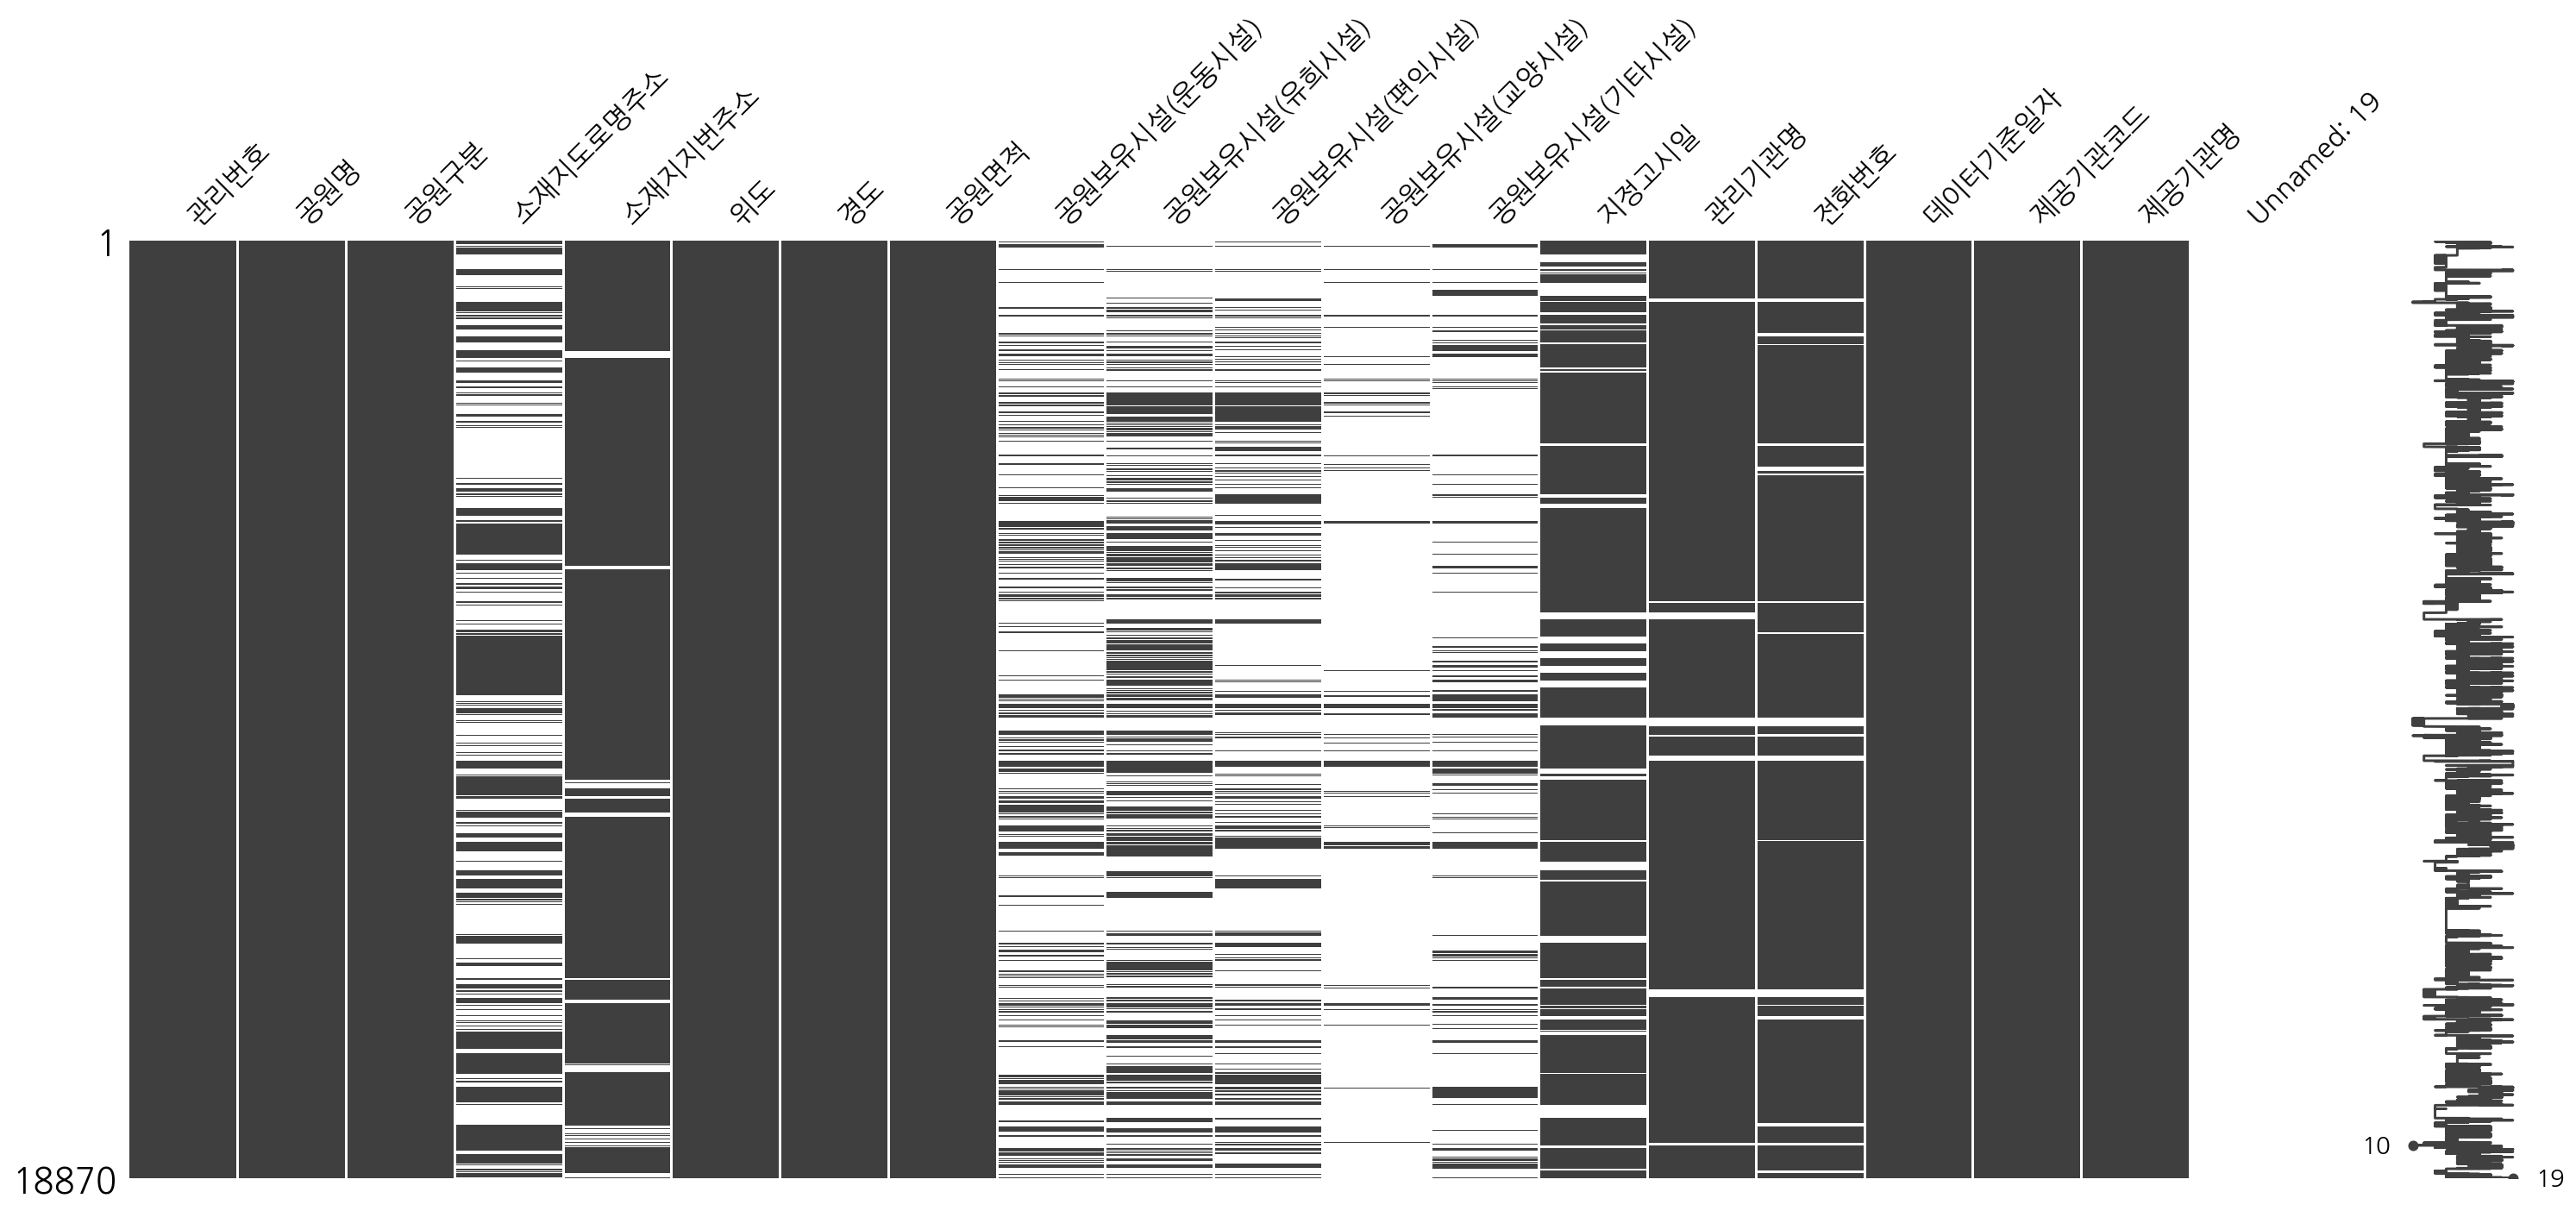

In [37]:
import missingno as msno

msno.matrix(park)

## 필요없는 칼럼 제거

In [40]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [43]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명','Unnamed: 19'], inplace=True)

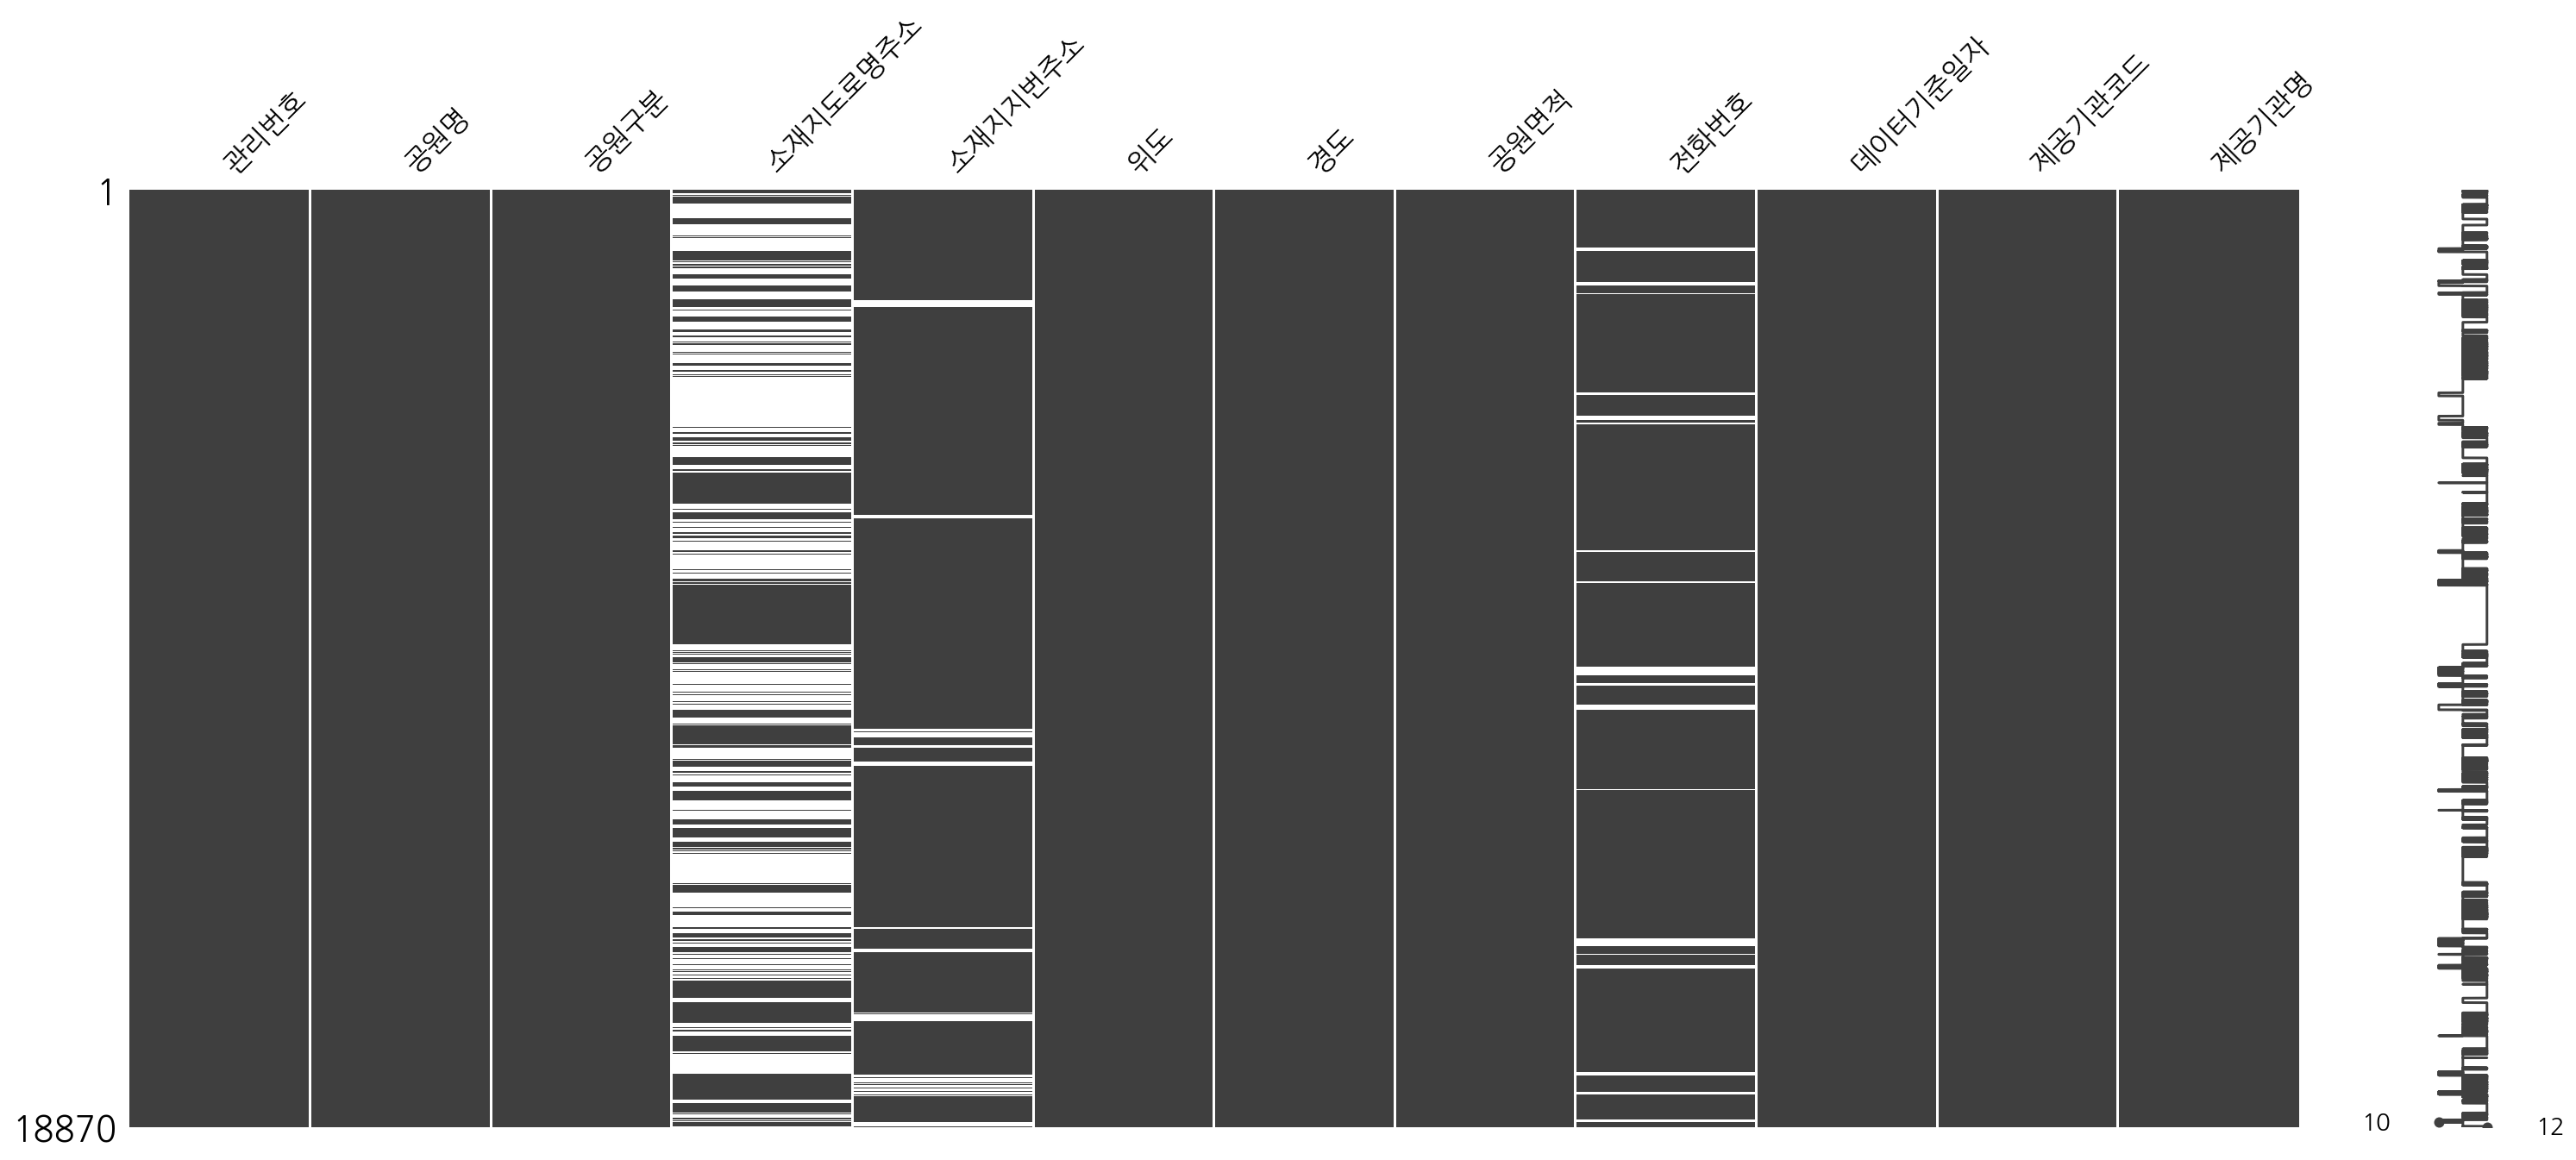

In [44]:
msno.matrix(park)

## 위경도를 지도로

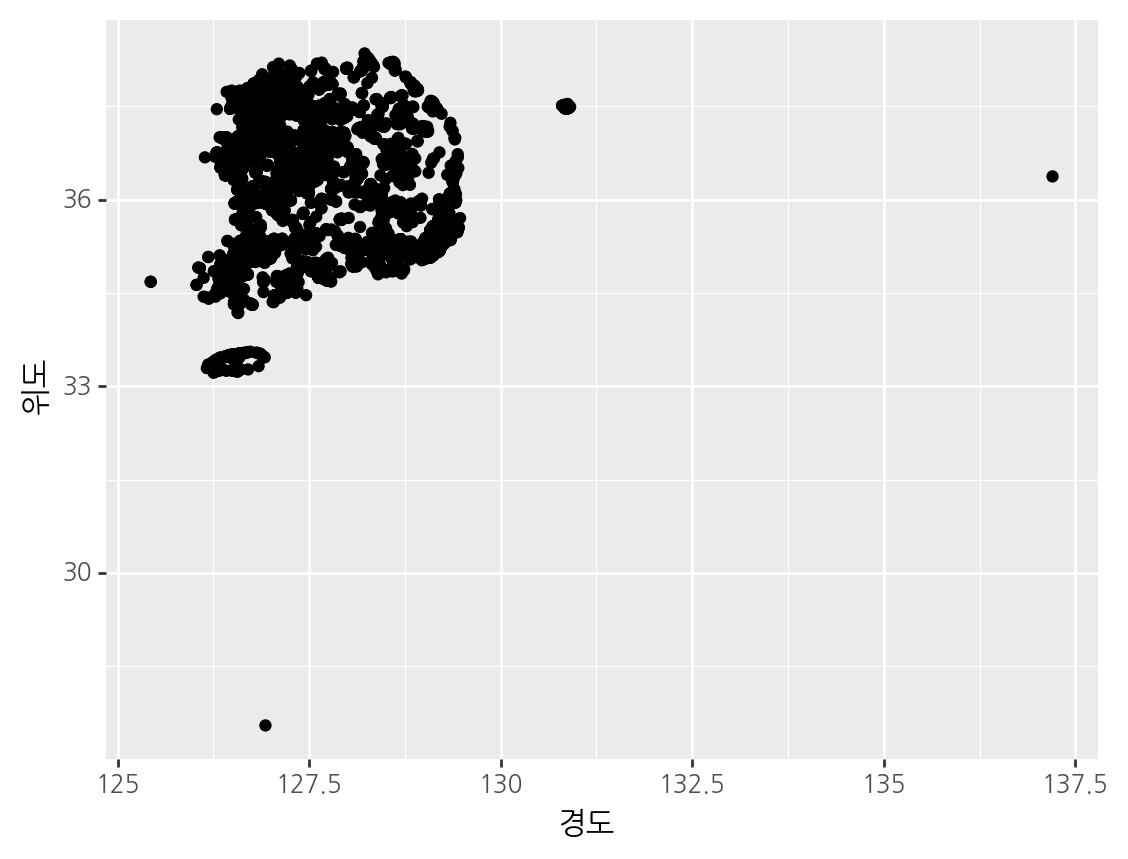

<ggplot: (8735128958249)>

In [48]:
(ggplot(park)+ aes(x='경도', y='위도') + geom_point() + theme(text=element_text(family='NanumGothic')) )

## 공원 면적

In [53]:
park['공원면적'] # => float ( 수치형 )

0          1048.0
1          1760.0
2          1511.0
3           752.0
4          1385.0
           ...   
18865       412.9
18866     56045.0
18867    109262.0
18868     67159.0
18869    380000.0
Name: 공원면적, Length: 18870, dtype: float64

In [54]:
# park['공원면적'] = park['공원면적'].str.replace(',', "").astype(float)
# park['공원면적']

In [66]:
park['공원면적비율'] = park['공원면적'].apply(
    lambda x: np.sqrt(x)*0.01)
park['공원면적비율'].head(2)

0    0.323728
1    0.419524
Name: 공원면적비율, dtype: float64

In [64]:
print(type(park['공원면적']))

<class 'pandas.core.series.Series'>


In [56]:
park.describe()

,위도,경도,공원면적,공원면적비율
count,18870.000000,18870.000000,1.887000e+04,18870.000000
mean,36.357038,127.536231,3.898528e+04,1.045744
std,1.062079,0.879728,2.216855e+05,1.674842
min,27.551606,125.430955,0.000000e+00,0.000000
25%,35.278095,126.883712,1.503900e+03,0.387801
50%,36.393152,127.131772,2.177150e+03,0.466599
75%,37.412262,128.407786,1.030475e+04,1.015123
max,38.350990,137.202661,8.703000e+06,29.500847


In [57]:
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]

In [58]:
park['시도'].head(2)

0    강원도
1    강원도
Name: 시도, dtype: object

In [59]:
park_loc_notnull = park.loc[(park['위도']>32) & (park['경도']<132) & park['시도'].notnull()]
park_loc_notnull.shape

(8742, 14)

## 경기도의 공원마커 표시

In [63]:
gg = park.loc[park['시도'] == '부산광역시']
geo_df = gg
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=13)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + '-' + geo_df.loc[n,'소재지도로명주소']
    icon_color = 'red'
    folium.CircleMarker(
        location=[geo_df.loc[n, "위도"], geo_df.loc[n,'경도']],
        radius = geo_df['공원면적비율'][n],
        popup=park_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map.save("./g.html")

In [ ]:
curl -v -X GET "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x=127.1086228&y=37.4012191" \
-H "Authorization: KakaoAK 424cdf3a438dc70e245232542f7626c8"

In [ ]:
curl -v -X GET "https://dapi.kakao.com/v2/local/geo/coord2address.json?x=127.423084873712&y=37.0789561558879&input_coord=WGS84" \
-H "Authorization: KakaoAK 424cdf3a438dc70e245232542f7626c8"

In [ ]:
curl -v -X GET "https://dapi.kakao.com/v2/local/search/keyword.json?y=37.514322572335935&x=127.06283102249932&radius=20000" \
--data-urlencode "query=카카오프렌즈" \
-H "Authorization: KakaoAK 424cdf3a438dc70e245232542f7626c8"

In [ ]:
# 서울 강남구 삼성동 20km 반경에서 약국 검색
curl -v -X GET "https://dapi.kakao.com/v2/local/search/category.json?category_group_code=PM9&rect=127.0561466,37.5058277,127.0602340,37.5142554" \
-H "Authorization: KakaoAK 424cdf3a438dc70e245232542f7626c8"